In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import japanize_matplotlib
import scipy as sp
import matplotlib.pyplot as plt
#from matplotlib.ticker import ScalarFormatter

In [2]:
# Read network data
random = nx.erdos_renyi_graph(10**4, 1/5)
collabo = nx.read_gml("./collaboration_network/cond-mat-2005.gml", label=None)
power = nx.read_gml("./power_grid/power.gml", label=None)
protein = nx.read_edgelist('./protein_network/protein.txt', nodetype=str)
hashtag = nx.read_graphml("./hashtag_network/hashtag.graphml")

In [3]:
def get_N_L(G):
    return G.number_of_nodes(), G.number_of_edges()

def get_k_knn(G):
    knn_dict = nx.k_nearest_neighbors(G)
    return list(knn_dict.keys()), list(knn_dict.values())

def plt_scatter(k, knn, title, jpn=False):
    # Initialize layout
    fig, ax = plt.subplots(figsize=(6,6))
    # Add scatterplot
    ax.set_title(title, fontsize=20)
    if not jpn:
        plt.rcParams['font.family'] = 'Arial'
    ax.scatter(k, knn, s=60, alpha=0.7, c="indigo",edgecolors="indigo")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(r"$k$", fontsize=14)
    ax.set_ylabel(r"$k_{nn}$", rotation="horizontal", fontsize=14)
    #ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    #ax.ticklabel_format(style="sci", axis="y", scilimits=(1,1))
    fig.savefig(f"{title}.png")

In [4]:
# random network
k_r, knn_r = get_k_knn(random)
# collaboration network
k_c, knn_c = get_k_knn(collabo)
# power grid
k_p, knn_p = get_k_knn(power)
# protein
k_pr, knn_pr = get_k_knn(protein)
# hashtag
k_h, knn_h = get_k_knn(hashtag)

C:\Users\yuki\AppData\Local\Temp\ipykernel_9412\3800548618.py:5: DeprecationWarning: k_nearest_neighbors function is deprecated and will be removed in v3.0.
Use `average_degree_connectivity` instead.
  knn_dict = nx.k_nearest_neighbors(G)


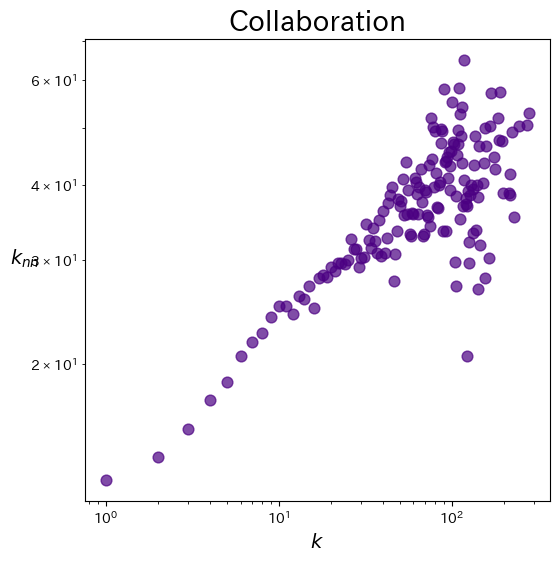

In [5]:
# collaboration network
plt_scatter(k_c, knn_c, "Collaboration")

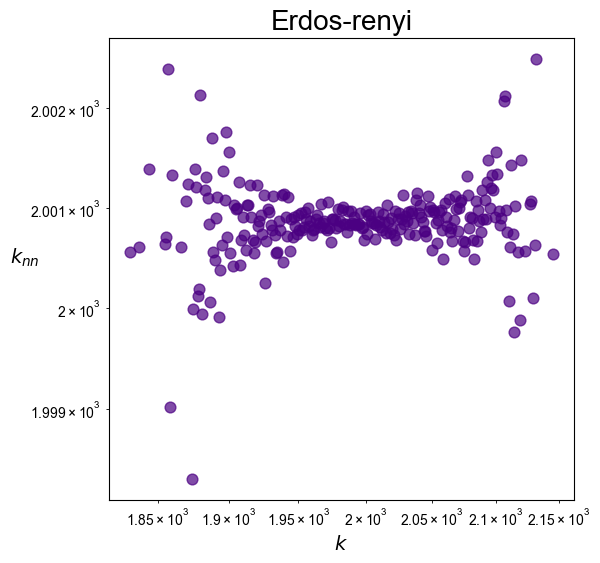

In [6]:
# random network
plt_scatter(k_r, knn_r, "Erdos-renyi")

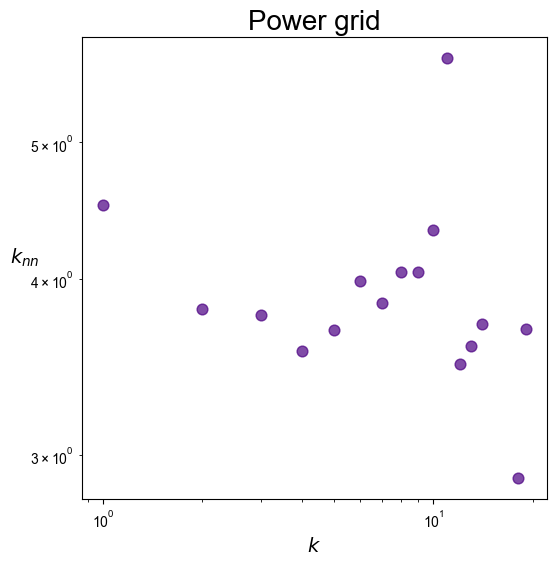

In [7]:
# power grid
plt_scatter(k_p, knn_p, "Power grid")

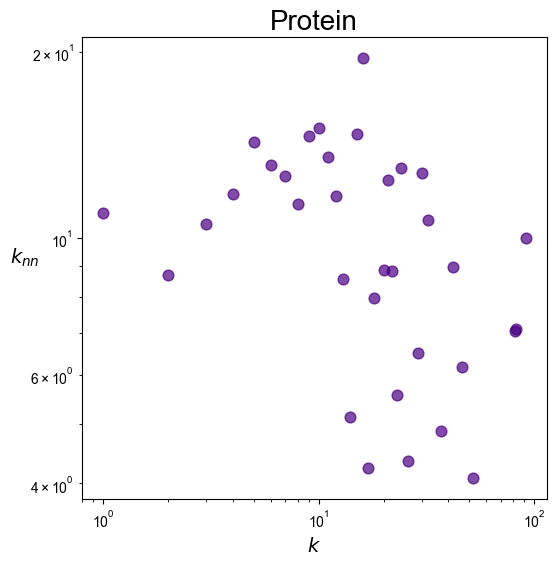

In [8]:
# protein
plt_scatter(k_pr, knn_pr, "Protein")

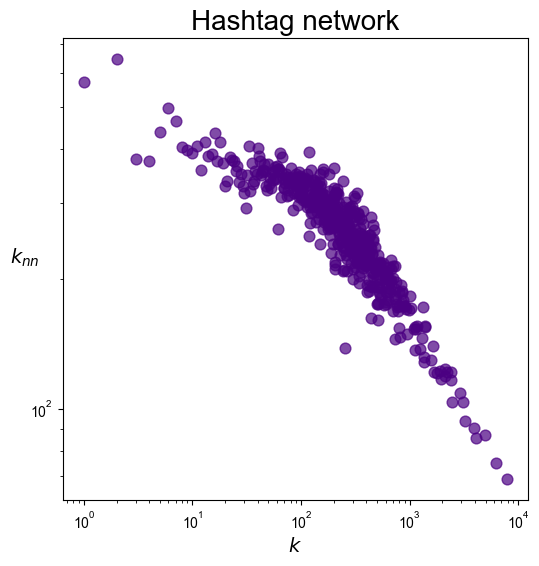

In [9]:
# hashtag
plt_scatter(k_h, knn_h, "Hashtag network", True)

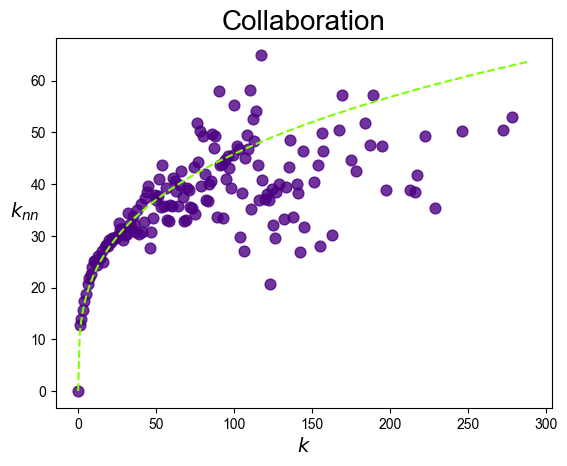

In [10]:
fig, ax = plt.subplots()
ax.set_title("Collaboration", fontsize=20)

k = np.arange(290)
knn = 11*k**0.31
# Add lineplot
ax.plot(k, knn, c="chartreuse", linestyle="--")
# Add scatterplot
ax.scatter(k_c, knn_c, s=60, alpha=0.8, c="indigo",edgecolors="indigo");
ax.set_xlabel(r"$k$", fontsize=14)
ax.set_ylabel(r"$k_{nn}$", rotation="horizontal", fontsize=14)
# ax.set_xscale("log")
# ax.set_yscale("log")
fig.savefig("collabo.png")

C:\Users\yuki\AppData\Local\Temp\ipykernel_9412\1558455597.py:5: RuntimeWarning: divide by zero encountered in power
  knn = 1000*k**(-0.29)


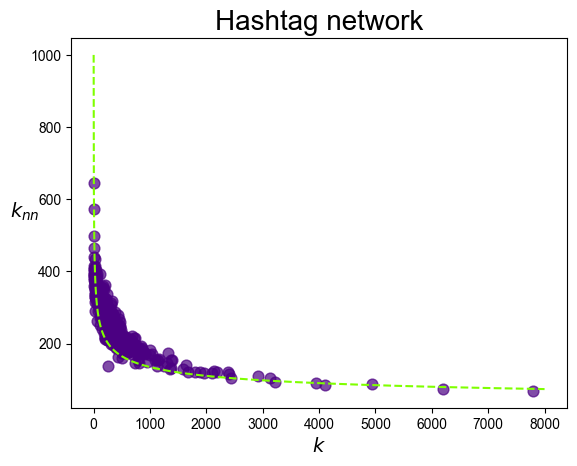

In [11]:
fig, ax = plt.subplots()
ax.set_title("Hashtag network", fontsize=20)

k = np.arange(8000)
knn = 1000*k**(-0.29)
# Add lineplot
ax.plot(k, knn, c="chartreuse", linestyle="--")
# Add scatterplot
ax.scatter(k_h, knn_h, s=60, alpha=0.7, c="indigo",edgecolors="indigo");
ax.set_xlabel(r"$k$", fontsize=14)
ax.set_ylabel(r"$k_{nn}$", rotation="horizontal", fontsize=14)
# ax.set_xscale("log")
# ax.set_yscale("log")
fig.savefig("hashtag.png")

In [12]:
df = pd.DataFrame(columns=["collaboration", "erdos-renyi", "power-grid", "protein", "hashtag"], index=[r"$N$", r"$r$"])
df.at[r"$r$", "collaboration"] = nx.degree_assortativity_coefficient(collabo)
df.at[r"$r$", "erdos-renyi"] = nx.degree_assortativity_coefficient(random)
df.at[r"$r$", "power-grid"] = nx.degree_assortativity_coefficient(power)
df.at[r"$r$", "protein"] = nx.degree_assortativity_coefficient(protein)
df.at[r"$r$", "hashtag"] = nx.degree_assortativity_coefficient(hashtag)
df.at[r"$N$", "collaboration"] = collabo.number_of_nodes()
df.at[r"$N$", "erdos-renyi"] = random.number_of_nodes()
df.at[r"$N$", "power-grid"] = power.number_of_nodes()
df.at[r"$N$", "protein"] = protein.number_of_nodes()
df.at[r"$N$", "hashtag"] = hashtag.number_of_nodes()

In [13]:
df

,collaboration,erdos-renyi,power-grid,protein,hashtag
$N$,40421,10000,4941,2018,32722
$r$,0.186327,0.000407,0.003457,-0.055078,-0.057815


In [15]:
# See if the two functions are different
print(nx.degree_pearson_correlation_coefficient(collabo), nx.degree_assortativity_coefficient(collabo))
print(nx.degree_pearson_correlation_coefficient(power), nx.degree_assortativity_coefficient(power))
print(nx.degree_pearson_correlation_coefficient(random), nx.degree_assortativity_coefficient(random))
print(nx.degree_pearson_correlation_coefficient(protein), nx.degree_assortativity_coefficient(protein))
print(nx.degree_pearson_correlation_coefficient(hashtag), nx.degree_assortativity_coefficient(hashtag))

0.18632684905229746 0.18632684905230537
0.0034569877442049007 0.0034569877442048825
0.0004065224085120808 0.0004065224085383577
-0.0550781093422518 -0.05507810934225171
-0.057814758187365506 -0.05781475818733237
